In [1]:
!pip install pywaffle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 39.3 MB/s eta 0:00:0000:0100:01


In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from pywaffle import Waffle
import numpy as np
import seaborn as sns
from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from textwrap import wrap
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder



In [20]:
df=pd.read_csv("/kaggle/input/capstone-spacex-datasets/dataset_part_2.csv")
df_1=pd.read_csv("/kaggle/input/capstone-spacex-datasets/dataset_part_2.csv")
df_2=pd.read_csv("/kaggle/input/capstone-spacex-datasets/dataset_part_2.csv")
df_3=pd.read_csv("/kaggle/input/capstone-spacex-datasets/dataset_part_2.csv")

df.head(10)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857,0
6,7,2014-04-18,Falcon 9,2296.000000,ISS,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857,1
7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857,1
8,9,2014-08-05,Falcon 9,4535.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1008,-80.577366,28.561857,0
9,10,2014-09-07,Falcon 9,4428.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1011,-80.577366,28.561857,0


In [28]:
count_of_ones = (df_2['Class'] == 1).sum()
print(f"Number of 1s in the 'Class' column: {count_of_ones}")
count_of_zero = (df_2['Class'] == 0).sum()
print(f"Number of 1s in the 'Class' column: {count_of_zero}")
#total number of successfull boosters landing for falcon 9 is 60

Number of 1s in the 'Class' column: 60
Number of 1s in the 'Class' column: 30


In [22]:
# Assuming your DataFrame is df_3
# First, convert the "Date" column to a datetime format
df_3['Date'] = pd.to_datetime(df_3['Date'])

# Filter the DataFrame for rows before and after 2019
before_2019 = df_3[df_3['Date'] < '2019-01-01']
after_2019 = df_3[df_3['Date'] >= '2019-01-01']

# Calculate the percentage of "0" (Failures) for each period with more decimal places
percentage_before_2019 = (before_2019['Class'] == 0).mean() * 100
percentage_after_2019 = (after_2019['Class'] == 0).mean() * 100

# Calculate the percentage of "1" (Successes) for each period with more decimal places
percentage_success_before_2019 = 100 - percentage_before_2019
percentage_success_after_2019 = 100 - percentage_after_2019

print(f"Percentage of '0' (Failures) before 2019: {percentage_before_2019:.4f}%")
print(f"Percentage of '1' (Successes) before 2019: {percentage_success_before_2019:.4f}%")
print(f"Percentage of '0' (Failures) after 2019: {percentage_after_2019:.4f}%")
print(f"Percentage of '1' (Successes) after 2019: {percentage_success_after_2019:.4f}%")

Percentage of '0' (Failures) before 2019: 42.6230%
Percentage of '1' (Successes) before 2019: 57.3770%
Percentage of '0' (Failures) after 2019: 13.7931%
Percentage of '1' (Successes) after 2019: 86.2069%


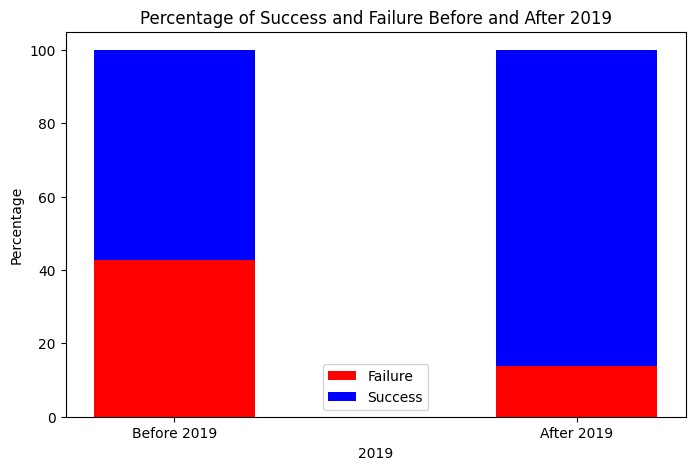

In [21]:
# Assuming your DataFrame is df_3
# First, convert the "Date" column to a datetime format
df_3['Date'] = pd.to_datetime(df_3['Date'])

# Filter the DataFrame for rows before and after 2019
before_2019 = df_3[df_3['Date'] < '2019-01-01']
after_2019 = df_3[df_3['Date'] >= '2019-01-01']

# Calculate the percentage of "0" (Failures) and "1" (Successes) for each period
percentage_before_2019 = [(before_2019['Class'] == 0).mean() * 100, (before_2019['Class'] == 1).mean() * 100]
percentage_after_2019 = [(after_2019['Class'] == 0).mean() * 100, (after_2019['Class'] == 1).mean() * 100]

# Create labels for the classes
labels = ['Before 2019', 'After 2019']

# Create positions for the bars
x = range(len(labels))

# Define colors for the bars
colors = ['red', 'blue']

# Create a single bar chart with different colors
plt.figure(figsize=(8, 5))
plt.bar(x, [percentage_before_2019[0], percentage_after_2019[0]], width=0.4, color=colors[0], label='Before 2019')
plt.bar(x, [percentage_before_2019[1], percentage_after_2019[1]], width=0.4, bottom=[percentage_before_2019[0], percentage_after_2019[0]], color=colors[1], label='Before 2019')

# Set labels and title
plt.xlabel('2019')
plt.ylabel('Percentage')
plt.title('Percentage of Success and Failure Before and After 2019')

# Add legend
plt.legend(labels=['Failure', 'Success'])

# Set x-axis labels
plt.xticks(x, labels)

# Show the plot
plt.show()


In [4]:
df.shape

(90, 18)

In [5]:
count_true = df['Reused'].value_counts()[True]
count_false = df['Reused'].value_counts()[False]

print("Number of True values:", count_true)
print("Number of False values:", count_false)


Number of True values: 37
Number of False values: 53


In [6]:
import scipy.stats as stats

correlation_coefficient, p_value = stats.pointbiserialr(df['Reused'], df['Class'])

print("Point-Biserial Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)


Point-Biserial Correlation Coefficient: 0.2075819358022084
P-value: 0.04962197284393674


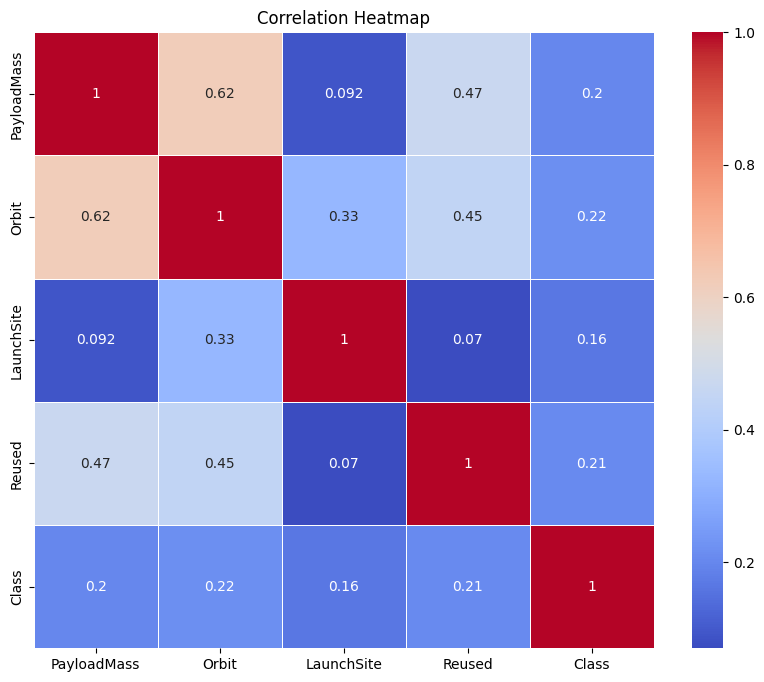

In [7]:
df_obs = df[['PayloadMass', 'Orbit', 'LaunchSite', 'Reused', 'Class']].copy()


orbit_encoder = LabelEncoder()
launch_site_encoder = LabelEncoder()

df_obs['Orbit'] = orbit_encoder.fit_transform(df_obs['Orbit'])
df_obs['LaunchSite'] = launch_site_encoder.fit_transform(df_obs['LaunchSite'])

correlation_matrix = df_obs.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

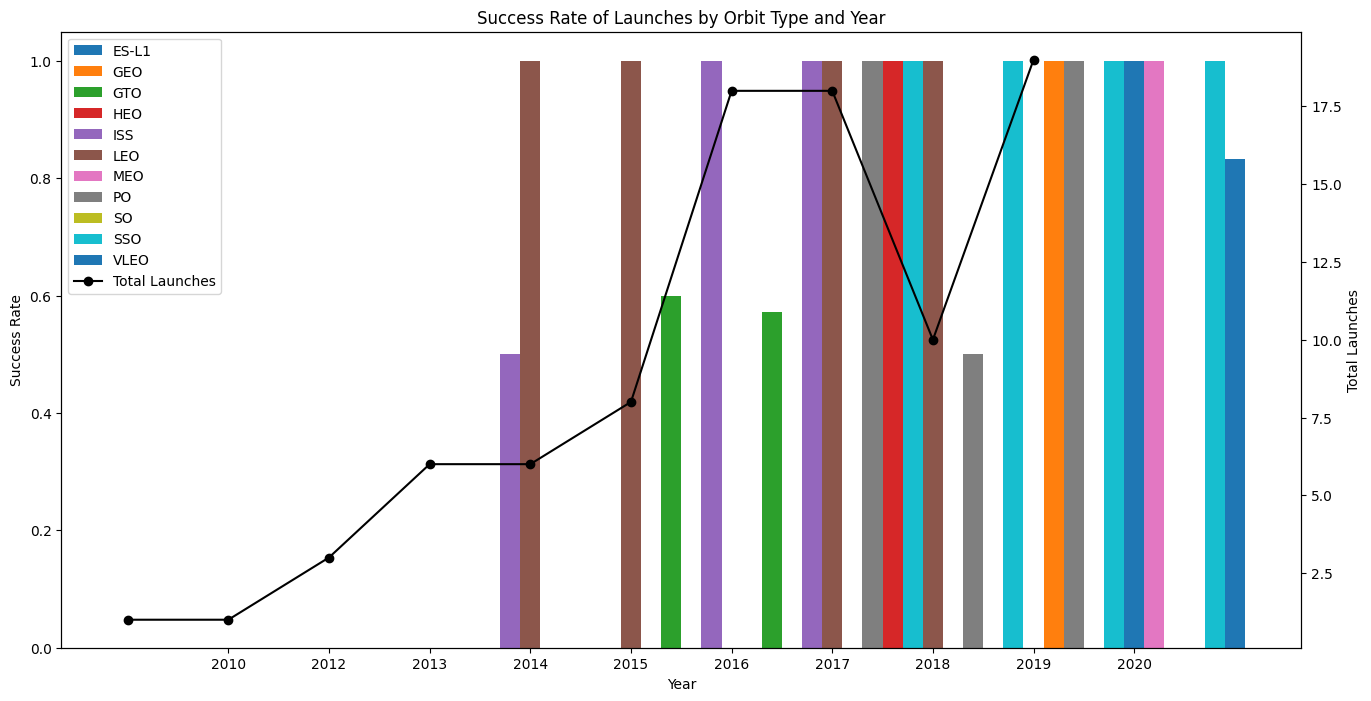

In [8]:
df['Year'] = pd.to_datetime(df['Date']).dt.year

grouped = df.groupby(['Year', 'Orbit'])['Class'].mean().reset_index()

pivot_table = grouped.pivot(index='Year', columns='Orbit', values='Class').fillna(0)

total_launches = df.groupby('Year').size()

years = pivot_table.index

bar_width = 0.2

positions = np.arange(len(years))

fig, ax1 = plt.subplots(figsize=(16, 8))

for i, orbit in enumerate(pivot_table.columns):
    ax1.bar(positions + i * bar_width, pivot_table[orbit], width=bar_width, label=orbit)

ax2 = ax1.twinx()
ax2.plot(positions, total_launches, marker='o', linestyle='-', color='black', label='Total Launches')

ax1.set_xlabel('Year')
ax1.set_ylabel('Success Rate')
ax2.set_ylabel('Total Launches')
ax1.set_title('Success Rate of Launches by Orbit Type and Year')
ax1.set_xticks(positions + bar_width * (len(pivot_table.columns) - 1) / 2)
ax1.set_xticklabels(years)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


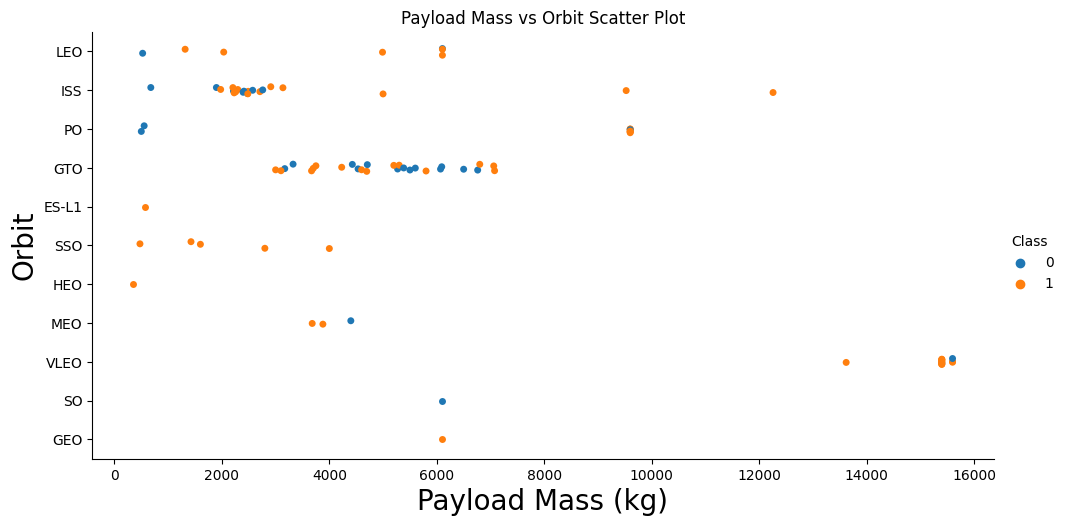

In [9]:
sns.catplot(y="Orbit", x="PayloadMass",data=df, hue="Class", aspect=2)
plt.xlabel("Payload Mass (kg)",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.title('Payload Mass vs Orbit Scatter Plot')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


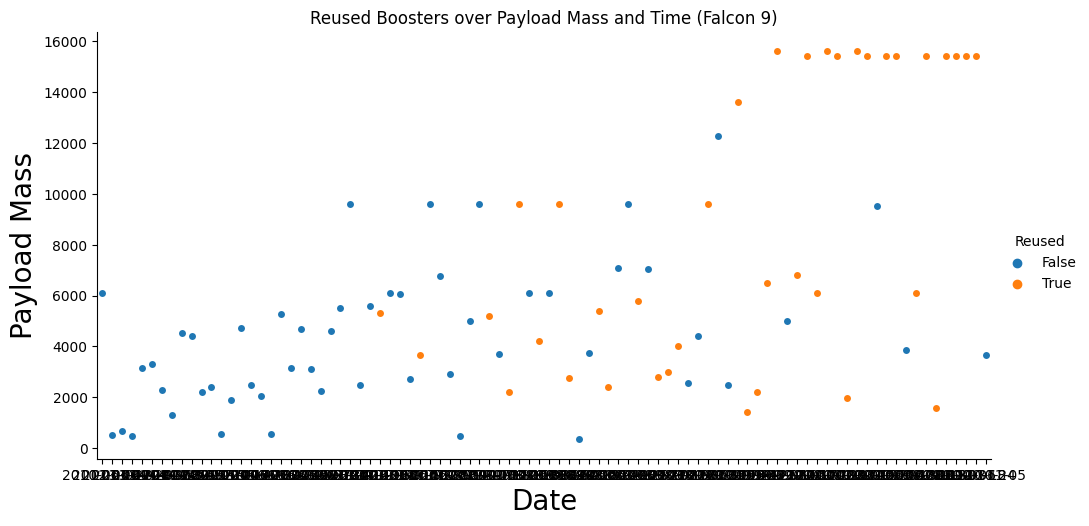

In [10]:
sns.catplot(y="PayloadMass", x="Date",data=df, hue="Reused", aspect=2)
plt.xlabel("Date",fontsize=20)
plt.ylabel("Payload Mass",fontsize=20)
plt.title('Reused Boosters over Payload Mass and Time (Falcon 9)')
plt.show()

In [11]:
df_b = df[df['Reused'] == True][['Date', 'Reused']]
print(df_b.head())


          Date  Reused
28  2017-03-30    True
32  2017-06-23    True
39  2017-10-11    True
41  2017-12-15    True
42  2017-12-23    True


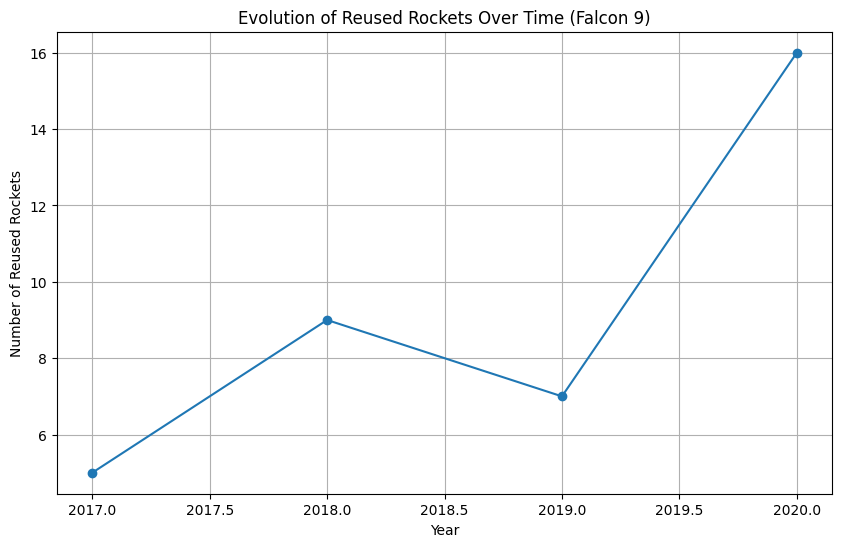

In [12]:
df_b['Date'] = pd.to_datetime(df_b['Date'])
df_b = df_b.sort_values(by='Date')
reuse_counts = df_b.set_index('Date').resample('Y')['Reused'].sum()

plt.figure(figsize=(10, 6))
plt.plot(reuse_counts.index.year, reuse_counts, marker='o', linestyle='-')
plt.title('Evolution of Reused Rockets Over Time (Falcon 9)')
plt.xlabel('Year')
plt.ylabel('Number of Reused Rockets')
plt.grid(True)
plt.show()

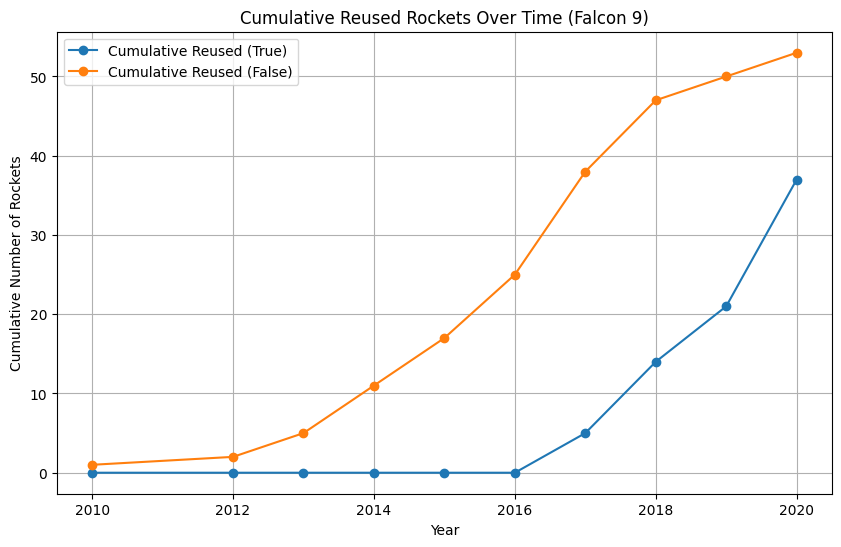

In [13]:
df_true = df[df['Reused'] == True][['Date', 'Reused']]

df_false = df[df['Reused'] == False][['Date']]
df_false['Reused'] = False 

df_b = pd.concat([df_true, df_false], ignore_index=True)

df_b['Date'] = pd.to_datetime(df_b['Date'])

df_b = df_b.sort_values(by='Date')

reuse_counts = df_b.groupby([df_b['Date'].dt.year, 'Reused']).size().unstack(fill_value=0)

cumulative_counts = reuse_counts.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(cumulative_counts.index, cumulative_counts[True], marker='o', linestyle='-', label='Cumulative Reused (True)')
plt.plot(cumulative_counts.index, cumulative_counts[False], marker='o', linestyle='-', label='Cumulative Reused (False)')
plt.title('Cumulative Reused Rockets Over Time (Falcon 9)')
plt.xlabel('Year')
plt.ylabel('Cumulative Number of Rockets')
plt.legend()
plt.grid(True)
plt.show()


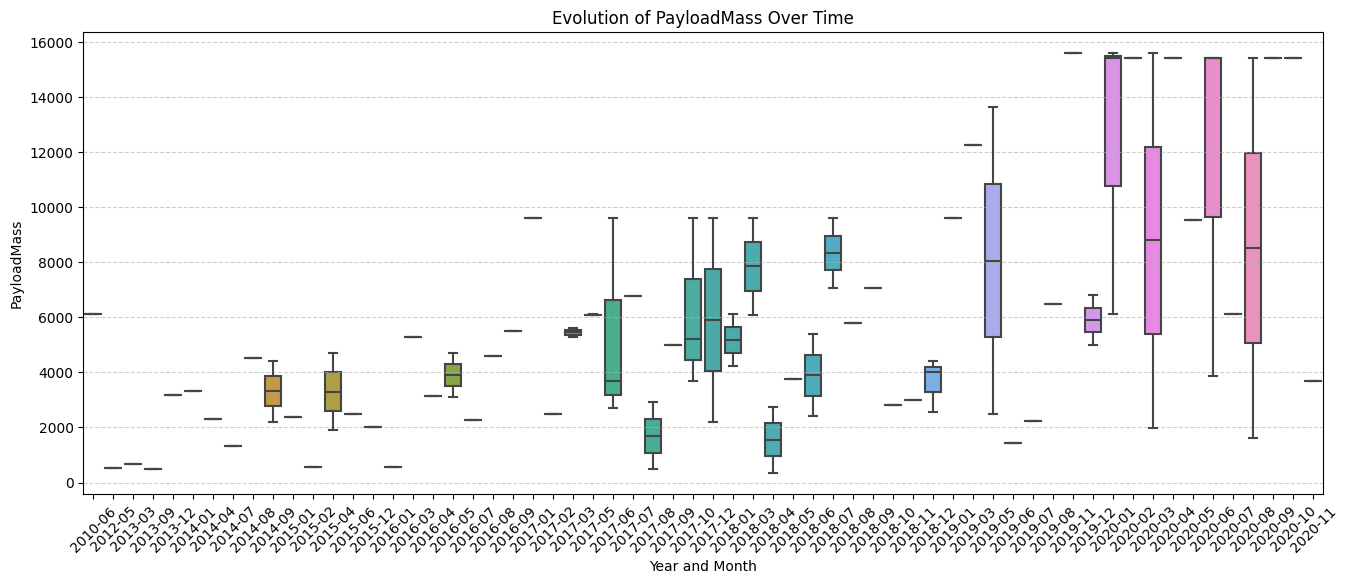

In [14]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year_Month'] = df['Date'].dt.to_period('M')

plt.figure(figsize=(16, 6))
sns.boxplot(data=df, x='Year_Month', y='PayloadMass')
plt.xticks(rotation=45)
plt.title('Evolution of PayloadMass Over Time')
plt.xlabel('Year and Month')
plt.ylabel('PayloadMass')
plt.grid(True, linestyle='--', alpha=0.6, axis='y')
plt.show()



In [15]:
df['Orbit'].unique

<bound method Series.unique of 0      LEO
1      LEO
2      ISS
3       PO
4      GTO
      ... 
85    VLEO
86    VLEO
87    VLEO
88    VLEO
89     MEO
Name: Orbit, Length: 90, dtype: object>

In [16]:
orbit_counts = df['Orbit'].value_counts()
print(orbit_counts)


Orbit
GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: count, dtype: int64


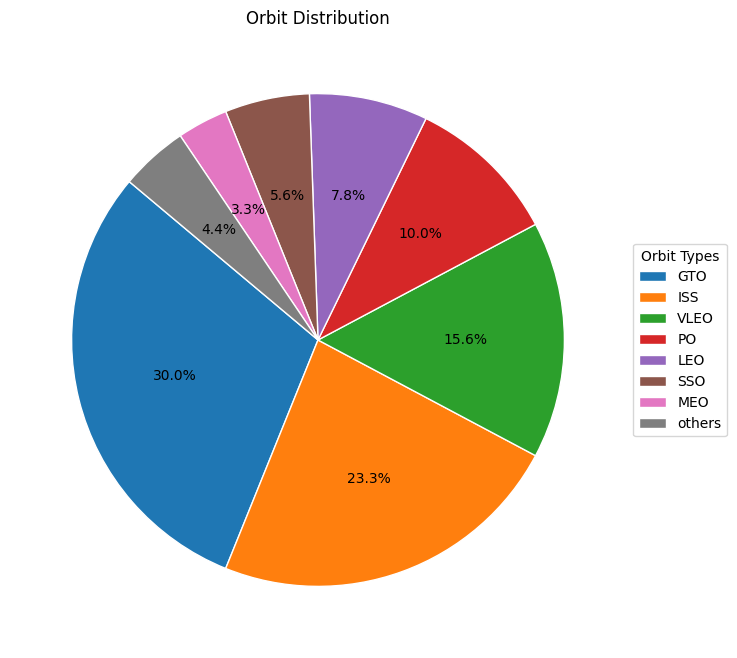

In [17]:
orbit_counts = df['Orbit'].value_counts()

# Group orbits with less than or equal to 1 occurrence into 'others'
threshold = 1
orbit_counts['others'] = orbit_counts[orbit_counts <= threshold].sum()
orbit_counts = orbit_counts[orbit_counts > threshold]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(orbit_counts, labels=None, autopct='%1.1f%%', startangle=140, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }) 

# Create a legend for the orbit types
plt.legend(orbit_counts.index, title='Orbit Types', loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Orbit Distribution')
plt.show()


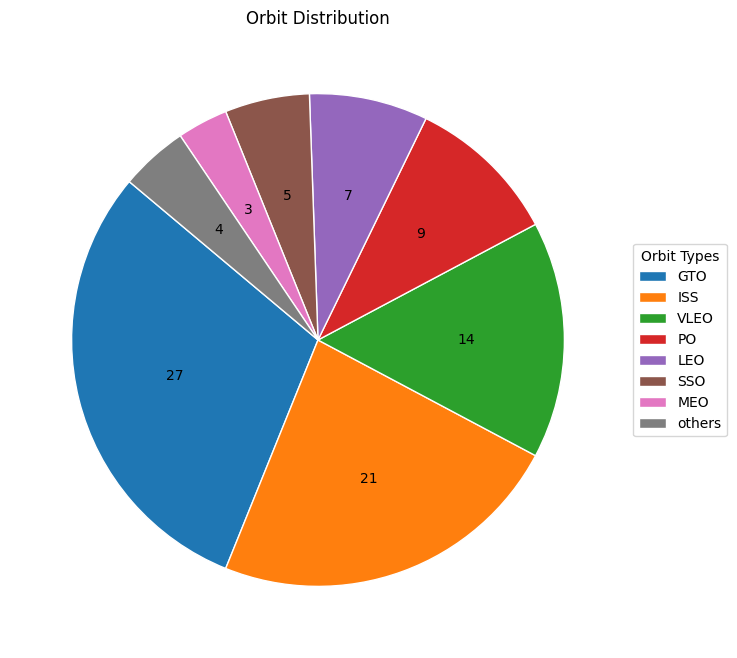

In [18]:
orbit_counts = df['Orbit'].value_counts()

# Group orbits with less than or equal to 1 occurrence into 'others'
threshold = 1
orbit_counts['others'] = orbit_counts[orbit_counts <= threshold].sum()
orbit_counts = orbit_counts[orbit_counts > threshold]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(orbit_counts, labels=None, autopct=lambda p: f'{int(p/100*sum(orbit_counts))}', startangle=140, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }) 

# Create a legend for the orbit types
plt.legend(orbit_counts.index, title='Orbit Types', loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Orbit Distribution')
plt.show()


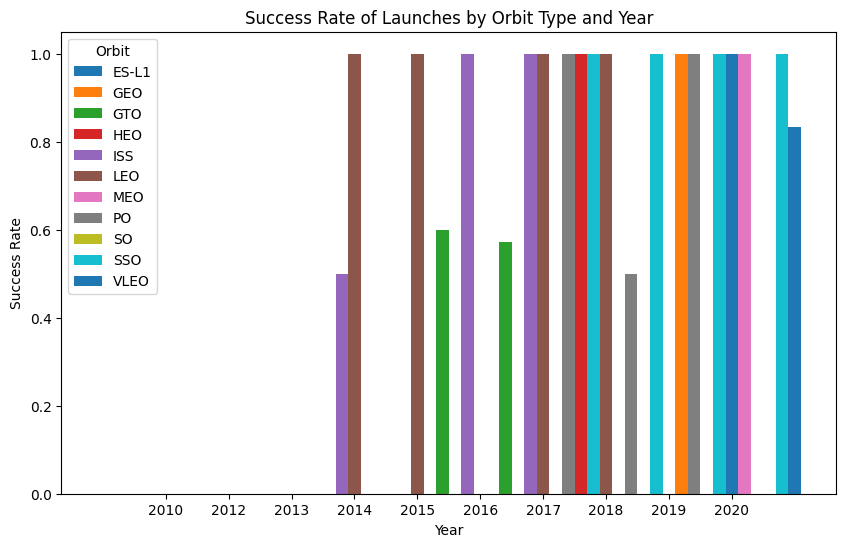

In [23]:
#Extra visualization

df['Year'] = pd.to_datetime(df['Date']).dt.year

grouped = df.groupby(['Year', 'Orbit'])['Class'].mean().reset_index()

pivot_table = grouped.pivot(index='Year', columns='Orbit', values='Class').fillna(0)

years = pivot_table.index

bar_width = 0.2

positions = np.arange(len(years))

fig, ax = plt.subplots(figsize=(10, 6))

for i, orbit in enumerate(pivot_table.columns):
    ax.bar(positions + i * bar_width, pivot_table[orbit], width=bar_width, label=orbit)

ax.set_xlabel('Year')
ax.set_ylabel('Success Rate')
ax.set_title('Success Rate of Launches by Orbit Type and Year')
ax.set_xticks(positions + bar_width * (len(pivot_table.columns) - 1) / 2)
ax.set_xticklabels(years)
ax.legend(title='Orbit', loc='upper left')

plt.show()

In [24]:
#Extra visualization

df['Year'] = pd.to_datetime(df['Date']).dt.year

pivot_table = df.pivot_table(index='Orbit', columns='Year', values='Date', aggfunc='count', fill_value=0)

pivot_table.columns = [f'Launches_{year}' for year in pivot_table.columns]

pivot_table.reset_index(inplace=True)

print(pivot_table)
df['Year'] = pd.to_datetime(df['Date']).dt.year

pivot_table = df.pivot_table(index='Orbit', columns='Year', values='Date', aggfunc='count', fill_value=0)

pivot_table.columns = [f'Launches_{year}' for year in pivot_table.columns]

pivot_table.reset_index(inplace=True)

print(pivot_table)

    Orbit  Launches_2010  Launches_2012  Launches_2013  Launches_2014  \
0   ES-L1              0              0              0              0   
1     GEO              0              0              0              0   
2     GTO              0              0              1              3   
3     HEO              0              0              0              0   
4     ISS              0              0              1              2   
5     LEO              1              1              0              1   
6     MEO              0              0              0              0   
7      PO              0              0              1              0   
8      SO              0              0              0              0   
9     SSO              0              0              0              0   
10   VLEO              0              0              0              0   

    Launches_2015  Launches_2016  Launches_2017  Launches_2018  Launches_2019  \
0               1              0          

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


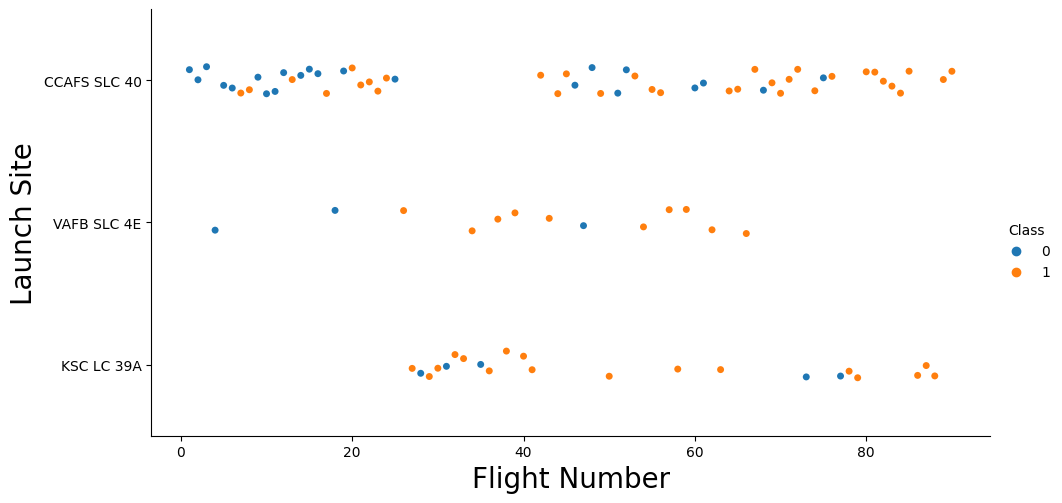

In [25]:
#Extra visualization
sns.catplot(y="LaunchSite", x="FlightNumber",hue="Class", data=df,aspect=2)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


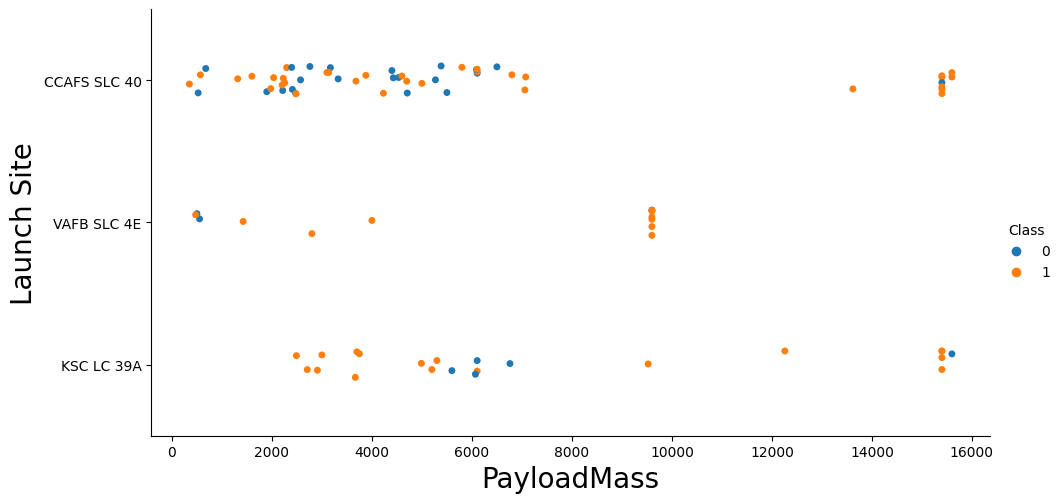

In [26]:
#Extra visualization
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df,aspect=2)
plt.xlabel("PayloadMass",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

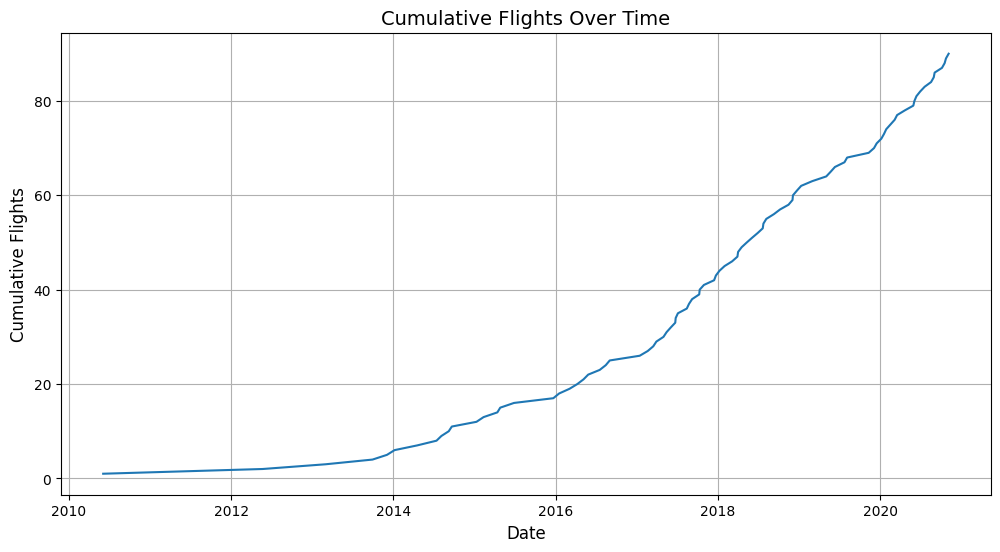

In [27]:
df_2['Date'] = pd.to_datetime(df_2['Date'])

df_2.sort_values(by='Date', inplace=True)

df_2['Cumulative Flights'] = range(1, len(df_2) + 1)

plt.figure(figsize=(12, 6))  
plt.plot(df_2['Date'], df_2['Cumulative Flights'])
plt.xlabel("Date", fontsize=12)
plt.ylabel("Cumulative Flights", fontsize=12)
plt.title("Cumulative Flights Over Time", fontsize=14)
plt.grid(True)

plt.show()
